# **Instagram Bot Account Detector and Classifier**

**Team 2 Members:**
* 0120711	Deryck Phang Hwa Keong
* 0131965	Ahmed Mahmoud Elashri
* 0131960	Abdelrahman Elashri

**Dataset Sources:**
* [Instagram fake spammer genuine accounts](https://www.kaggle.com/datasets/free4ever1/instagram-fake-spammer-genuine-accounts)
* [Fake/Authentic User Instagram](https://www.kaggle.com/datasets/krpurba/fakeauthentic-user-instagram)

**References:**
* [Fake Instagram Profile Detection Model](https://www.kaggle.com/code/durgeshrao9993/fake-instagram-profile-detection-model)
* [📷 Insta-Fake? Spot 'em! 🔎🕵️‍♂️](https://www.kaggle.com/code/lusfernandotorres/insta-fake-spot-em)



## **1.0 Introduction**

### **Research Question**
* **RQ01**
  
  How effective can machine learning be at detecting fake and real instagram accounts?
* **RQ02**
  
  What are the instagram features that can affect the prediction performance of the fake account detection model?



### **Hypothesis Analysis**

- **Null Hypothesis:**

  Number of accounts followed does not correlate with whether an account is fake or not.

- **Alternative Hypothesis:**

  Number of accounts followed does correlate with whether an account is fake or not.

## **2.0 Dataset Cleaning & Preperation**
The first important step of the project is to load the dataset, understand the structure of the dataset, while also cleaning it and ensuring that it is ready to be used to train the specified model. 

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np

# Graphs and Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

from sklearn.pipeline import Pipeline # Pipeline for chaining multiple data preprocessing steps
from sklearn.preprocessing import StandardScaler # Data rescaling
from sklearn.model_selection import train_test_split # Data splitting 
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report # Evaluation Metrics
from sklearn.preprocessing import FunctionTransformer

# https://github.com/slundberg/shap/issues/1355
!pip install shap
import shap # Machine Learning explainability librart

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

!pip install catboost
from catboost import CatBoostClassifier


from sklearn.model_selection import train_test_split

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()

### **Reading Datasets**
Datasets from 2 different sources will be read.

#### **Dataset Source 1**
Dataset source obtained from [Instagram fake spammer genuine accounts](https://www.kaggle.com/datasets/free4ever1/instagram-fake-spammer-genuine-accounts) by BARDIYA BAKHSHANDEH.

The dataset has already been split into a training set and test set. Both sets will be combined for the purposes of this project as the final dataset will be manually split through the use of the train-test-split library and function.


In [ ]:
# Instagram account test dataset from source 2 
df_raw_insta_1test = pd.read_csv("/content/drive/MyDrive/KDU College University/2023 Jan - XBDS2034 Data Science Toolbox/Assignment/Python/Datasets/test.csv")
df_raw_insta_1test.head(3)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0


In [ ]:
# Calculate size of df_raw_insta_1test
# https://stackoverflow.com/questions/17468878/pandas-python-how-to-count-the-number-of-records-or-rows-in-a-dataframe#46441827
df_raw_insta_1test.shape

(120, 12)

The `df_raw_insta_1test` dataframe has **120 rows** and **12 columns**.

In [ ]:
# Instagram account train dataset from source 2 
df_raw_insta_1train = pd.read_csv("/content/drive/MyDrive/KDU College University/2023 Jan - XBDS2034 Data Science Toolbox/Assignment/Python/Datasets/train.csv")
df_raw_insta_1train.head(3)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0


In [ ]:
# Calculate size of df_raw_insta_1train
df_raw_insta_1train.shape

(576, 12)

The `df_raw_insta_1train` dataframe has **576 rows** and **12 columns**.

Next, combine both train and test datasets.

In [ ]:
# Combine both train and test tables.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
df_raw_insta_1 = pd.concat([df_raw_insta_1test, df_raw_insta_1train])
df_raw_insta_1.head(3)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0


In [ ]:
# Calculate size of df_raw_insta_1train
df_raw_insta_1.shape

(696, 12)

The final total of the `df_raw_insta_1` dataframe has **696 rows** and **12 columns**.

In [ ]:
df_raw_insta_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           696 non-null    int64  
 1   nums/length username  696 non-null    float64
 2   fullname words        696 non-null    int64  
 3   nums/length fullname  696 non-null    float64
 4   name==username        696 non-null    int64  
 5   description length    696 non-null    int64  
 6   external URL          696 non-null    int64  
 7   private               696 non-null    int64  
 8   #posts                696 non-null    int64  
 9   #followers            696 non-null    int64  
 10  #follows              696 non-null    int64  
 11  fake                  696 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 70.7 KB


##### **Data Dictionary**

`df_raw_insta_1` contains a total of **969 rows** and **12 columns**.

* `profile pic` : Whether the user has profile picture or not. (0 = No, 1 = Yes)
* `nums/length username` : Ratio of the number of numerical chars in username to its length.
* `fullname words` : User's full name in word tokens.
* `nums/length fullname` : Ratio of the number of numerical characters in full name to its length.
* `name==username` : Whether the user's username and full name are the same. (0 = No, 1 = Yes)
* `description length` : The Instagram user's bio length in characters.
* `external URL` : Whether the user has included an external URL in their Instagram profile. (0 = No, 1 = Yes)
* `private` : Whether the Instagram user's profile is private or not. (0 = No, 1 = Yes)
* `#posts` : The number of posts by a user.
* `#followers` : The number of followers by a user.
* `#follows` : The number of accounts followed by the user. 
* `fake` : Target class. (0 = Genuine, 1 = Spammer/Bot)

#### **Dataset Source 2**
Dataset source obtained from [Fake/Authentic User Instagram](https://www.kaggle.com/datasets/krpurba/fakeauthentic-user-instagram?select=user_fake_authentic_2class.csv) by KRISTO RADION PURBA.

The dataset provides 2 classification labels for the data and also further provides 4 classification labels. This project will use the normal 2 classifier labels for simplicity as well as having it be compatible with the rest of the datasets.

In [ ]:
# Instagram account train dataset from source 3
df_raw_insta_2 = pd.read_csv("/content/drive/MyDrive/KDU College University/2023 Jan - XBDS2034 Data Science Toolbox/Assignment/Python/Datasets/user_fake_authentic_2class.csv")
df_raw_insta_2.head(3)

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.0,1.5,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.0,2.5,0.0,0.056,0.572174,43.569939,f


In [ ]:
df_raw_insta_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65326 entries, 0 to 65325
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     65326 non-null  int64  
 1   flw     65326 non-null  int64  
 2   flg     65326 non-null  int64  
 3   bl      65326 non-null  int64  
 4   pic     65326 non-null  int64  
 5   lin     65326 non-null  int64  
 6   cl      65326 non-null  int64  
 7   cz      65326 non-null  float64
 8   ni      65326 non-null  float64
 9   erl     65326 non-null  float64
 10  erc     65326 non-null  float64
 11  lt      65326 non-null  float64
 12  hc      65326 non-null  float64
 13  pr      65326 non-null  float64
 14  fo      65326 non-null  float64
 15  cs      65326 non-null  float64
 16  pi      65326 non-null  float64
 17  class   65326 non-null  object 
dtypes: float64(10), int64(7), object(1)
memory usage: 9.0+ MB


##### **Data Dictionary**

`df_raw_insta_2` has a total of **65326 rows** and **17 columns**.

* `pos` : Number of total posts that the user has ever posted.
* `flw` : The number of followers of a user.
* `flg` : The number of accounts followed by the user.
* `bl` : Bio length. Length (number of characters) of the user's biography
* `pic` : Picture availability. Whether the user has a profile picture. (0 = No, 1 = Yes)
* `lin` : Link availability. Whether the user has an external URL in their profile bio. (0 = No, 1 = Yes)
* `cl` : Average caption length. The average number of characters in the captions of the user's media posts.
* `cz` : Caption zero. Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length
* `ni` : Non image percentage. Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel.
* `erl` : Engagement rate (Like). Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers).
* `erc` : Engagement rate (Comm.). Similar to ER like, but for comments instead.
* `lt` : Location tag percentage. Percentage (0.0 to 1.0) of posts tagged with location information.
* `hc` : Average hashtag count. Average number of hashtags used in a post.
* `pr` : Promotional keywords. Average use of promotional keywords in hashtag, i.e. *{regrann, contest, repost, giveaway, mention, share, give away, quiz}*
* `fo` : Followers keywords. Average use of followers hunter keywords in hashtag, i.e. *{follow, like, folback, follback, f4f}*
* `cs` : Cosine similarity. Average cosine similarity of between all pair of two posts a user has.
* `pi` : Post interval. Average interval between posts (in hours).
* `class` : 2-class User classes : r = (real/authentic user), f = (fake user / bought followers).

### **Dropping Unrelated Columns**
Since the model will be built with the features contained in the dataset of source 1 (`df_raw_insta_1 `), certain columns from `df_raw_insta_2` will have to be dropped to ensure that the data is able to be merged smoothly with the primary dataset.

Though a few columns from `df_raw_insta_1` would have to be dropped as well to ensure ease of merging.

In [ ]:
# Initial df_raw_insta_2 column check 
df_raw_insta_2.columns

Index(['pos', 'flw', 'flg', 'bl', 'pic', 'lin', 'cl', 'cz', 'ni', 'erl', 'erc',
       'lt', 'hc', 'pr', 'fo', 'cs', 'pi', 'class'],
      dtype='object')

In [ ]:
# Dropping columns in df_raw_insta_2 
# https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
df_raw_insta_2.drop(['cl', 'cz', 'ni', 'erl', 'erc', 'lt', 'hc', 'pr', 'fo', 'cs', 'pi'], axis=1, inplace=True)

#  df_raw_insta_2 column check after changes 
df_raw_insta_2.columns

Index(['pos', 'flw', 'flg', 'bl', 'pic', 'lin', 'class'], dtype='object')

Dropping a couple of unneeded columns in `df_raw_insta_1`.

In [ ]:
# Initial df_raw_insta_1 column check 
df_raw_insta_1.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [ ]:
# Dropping columns in df_raw_insta_1 
# https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
df_raw_insta_1.drop(['nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'private'], axis=1, inplace=True)

#  df_raw_insta_1 column check after changes 
df_raw_insta_1.columns

Index(['profile pic', 'description length', 'external URL', '#posts',
       '#followers', '#follows', 'fake'],
      dtype='object')

### **Converting the `class` Value in `df_raw_insta_2`**
The `class` value in `df_raw_insta_2` consists of f for fake and r for real or authentic accounts. It is required to convert these characters into binary values of 1 and 0 respectively instead for merging purposes and ease of understanding and interpretation of the model.

In [ ]:
# Display df_raw_insta_2 before change
df_raw_insta_2

,pos,flw,flg,bl,pic,lin,class
0,44,48,325,33,1,0,f
1,10,66,321,150,1,0,f
2,33,970,308,101,1,1,f
3,70,86,360,14,1,0,f
4,3,21,285,73,1,0,f
...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,r
65322,652,3000,1300,146,1,1,r
65323,1500,3700,3200,147,1,1,r
65324,329,1500,1800,218,1,1,r


In [ ]:
# Change f to 1, and r to 0
# https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
mapping = {'f': 1, 'r': 0}
df_raw_insta_2 = df_raw_insta_2.replace({'class': mapping})

# Display df_raw_insta_2 after change
df_raw_insta_2

,pos,flw,flg,bl,pic,lin,class
0,44,48,325,33,1,0,1
1,10,66,321,150,1,0,1
2,33,970,308,101,1,1,1
3,70,86,360,14,1,0,1
4,3,21,285,73,1,0,1
...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,0
65322,652,3000,1300,146,1,1,0
65323,1500,3700,3200,147,1,1,0
65324,329,1500,1800,218,1,1,0


As shown in the table above, the values in `class` have been changed to f = 1, and r = 0. Which fits the target variable labelling in `df_raw_insta_1`.

In [ ]:
df_raw_insta_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65326 entries, 0 to 65325
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pos     65326 non-null  int64
 1   flw     65326 non-null  int64
 2   flg     65326 non-null  int64
 3   bl      65326 non-null  int64
 4   pic     65326 non-null  int64
 5   lin     65326 non-null  int64
 6   class   65326 non-null  int64
dtypes: int64(7)
memory usage: 3.5 MB


### **Reordering, Renaming Columns & Combining Datasets**
Columns from both `df_raw_insta_1` and `df_raw_insta_2` will have to be reordered and renamed to a universal name to ensure a smooth merging process and better readability.

In [ ]:
# Reordering columns in df_raw_insta_2 
# https://www.datasciencemadesimple.com/re-arrange-or-re-order-the-column-of-dataframe-in-pandas-python-2/
df_raw_insta_2 = df_raw_insta_2.reindex(columns=['pic', 'bl', 'lin', 'pos', 'flw', 'flg', 'class'])

#  df_raw_insta_2 column check after changes 
df_raw_insta_2.head(1)

,pic,bl,lin,pos,flw,flg,class
0,1,33,0,44,48,325,1


In [ ]:
# Renaming columns in df_raw_insta_2
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df_raw_insta_2.rename(columns={'pic': 'hasProfilePic', 
                               'bl': 'bioLength', 
                               'lin': 'hasUrl', 
                               'pos': 'noPosts', 
                               'flw': 'noFollowers',
                               'flg': 'noFollows', 
                               'class': 'isFake'}, inplace=True)

# Check changes 
df_raw_insta_2.columns

Index(['hasProfilePic', 'bioLength', 'hasUrl', 'noPosts', 'noFollowers',
       'noFollows', 'isFake'],
      dtype='object')

In [ ]:
# Renaming columns in df_raw_insta_1
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df_raw_insta_1.rename(columns={'profile pic': 'hasProfilePic', 
                               'description length': 'bioLength', 
                               'external URL': 'hasUrl', 
                               '#posts': 'noPosts', 
                               '#followers': 'noFollowers',
                               '#follows': 'noFollows', 
                               'fake': 'isFake'}, inplace=True)

# Check changes 
df_raw_insta_1.columns

Index(['hasProfilePic', 'bioLength', 'hasUrl', 'noPosts', 'noFollowers',
       'noFollows', 'isFake'],
      dtype='object')

In [ ]:
# Combining both datasets together
df_insta_main  = pd.concat([df_raw_insta_1, df_raw_insta_2])
df_insta_main 

,hasProfilePic,bioLength,hasUrl,noPosts,noFollowers,noFollows,isFake
0,1,30,0,35,488,604,0
1,1,64,0,3,35,6,0
2,1,82,0,319,328,668,0
3,1,143,0,273,14890,7369,0
4,1,76,0,6,225,356,0
...,...,...,...,...,...,...,...
65321,1,0,0,13,145,642,0
65322,1,146,1,652,3000,1300,0
65323,1,147,1,1500,3700,3200,0
65324,1,218,1,329,1500,1800,0


After combining both `df_raw_insta_1` and `df_raw_insta_2` together, our final dataset called `df_insta_main` has a total of **66022 rows** and **7 columns**.

### **Checking & Removal of Null & Duplicate Values**
Null and duplicate values in the dataset can affect the model learning process. Hence, in the case of this project, they will be dropped from the dataset.

In [ ]:
# Defining a function to return the number of null and duplicated values in the dataset
def inspect(df):
    print('\n')
    print('Missing Values: ')
    print(df.isnull().sum())
    print('\n')
    print('Duplicated Values: ')    
    print(df.duplicated().sum())
    print('\n')
    print('Data Types: ')
    print(df.dtypes)
    print('\n')
    print(f'Rows: {df.shape[0]}')   
    print(f'Attributes: {df.shape[1]}')
    return

In [ ]:
inspect(df_insta_main)



Missing Values: 
hasProfilePic    0
bioLength        0
hasUrl           0
noPosts          0
noFollowers      0
noFollows        0
isFake           0
dtype: int64


Duplicated Values: 
1376


Data Types: 
hasProfilePic    int64
bioLength        int64
hasUrl           int64
noPosts          int64
noFollowers      int64
noFollows        int64
isFake           int64
dtype: object


Rows: 66022
Attributes: 7


From the results above obtained from the `inspect()` function, we can see that `df_insta_main` has **no null values**. 

Though it does have 1376 rows of duplicated values.

In [ ]:
# Visualizing duplicated rows in df_insta_main 
df_insta_main_duplicated = df_insta_main[df_insta_main.duplicated(keep=False)]
df_insta_main_duplicated

,hasProfilePic,bioLength,hasUrl,noPosts,noFollowers,noFollows,isFake
60,0,0,0,0,0,2,1
61,1,0,0,0,45,64,1
63,0,0,0,0,69,694,1
67,0,0,0,0,69,694,1
83,1,0,0,0,45,64,1
...,...,...,...,...,...,...,...
54998,1,0,0,1,86,148,0
56212,0,0,0,1,7,23,0
57050,1,0,0,1,9,128,0
60043,1,0,0,1,86,148,0


Duplicated rows have the potential to affect the model training process and introduce bias and cause overfitting issues. Hence, they must be dropped from the dataset. 

In [ ]:
# Removing duplicate values
df_insta_main.drop_duplicates(inplace = True)

# Check changes
df_insta_main.shape

(64646, 7)

The final size of the `df_insta_main` dataset after dropping duplicates is **64646 rows** and **7 columns**.

## **3.0 Exploratory Data Analysis (EDA)**
EDA will be conducted to further analyze the data and find certain patterns or information to visualize into charts and graphs for further insight.

In [ ]:
# Defining a function to categorize features
# https://www.kaggle.com/code/lusfernandotorres/insta-fake-spot-em#data-treatment
def categorize_features(df):
    # creating empty lists
    continuous_features = []
    binary_features = []
    
    for col in df.columns:
        if df[col].nunique() <= 2: # if the number of unique values per feature is either equal or smaller than 2, it gets appended to the binary_features list
            binary_features.append(col)
        else:
            continuous_features.append(col) # In case it has more unique values than 2, it get appended to the continuous_feature list
    return continuous_features, binary_features

In [ ]:
# Creating lists with the function
continuous_features, binary_features = categorize_features(df_insta_main)

In [ ]:
# Printing feature categorizations
print('\n')
print('Continuous features:')
print(continuous_features)
print('\n')
print('Binary features:')
print(binary_features)



Continuous features:
['bioLength', 'noPosts', 'noFollowers', 'noFollows']


Binary features:
['hasProfilePic', 'hasUrl', 'isFake']


With the `categorize_features` function, the features have been categorized into binary and continuous features based on their values.

### **General Observations**

In [ ]:
# General observations using describe()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df_insta_main.describe()

,hasProfilePic,bioLength,hasUrl,noPosts,noFollowers,noFollows,isFake
count,64646.000000,64646.000000,64646.000000,64646.000000,6.464600e+04,64646.000000,64646.000000
mean,0.956563,58.351793,0.286112,179.527921,2.046725e+03,2265.324165,0.492668
std,0.203839,64.135723,0.451946,727.901715,9.043802e+04,2556.293935,0.499950
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,0.000000,0.000000,6.000000,1.310000e+02,396.000000,0.000000
50%,1.000000,34.000000,0.000000,31.000000,3.490000e+02,984.000000,0.000000
75%,1.000000,111.000000,1.000000,127.000000,8.320000e+02,3400.000000,1.000000
max,1.000000,555.000000,1.000000,76200.000000,1.533854e+07,8800.000000,1.000000


* About 96% of Instagram accounts in the dataset have profile pictures.
* The average bio length of a user's Instagram account is 58 words.
* About 29% of instagram accounts in the dataset have included external URLs in their profile.
* The average user's total number of posts is around 180 posts.
* About 49% of the accounts in this dataset is fake or are bot accounts.

---

* The average user's total follower count is 2048 followers.
* The average user follows about 2265 accounts in Instagram.

This shows that the average Instagram user in this dataset follows more accounts compared to their number of followers.

### **Binary Features**

#### **Profile Picture**

In [ ]:
# Removing target variable from the list
binary_features.remove('isFake') 

# Creating another dataframe to label real and fake accounts
legend_df = df_insta_main.copy()
legend_df['isFake'] = legend_df['isFake'].replace({0: 'Real Accounts', 1: "Fake Accounts"}) 

In [ ]:
fig = px.histogram(df_insta_main, x=binary_features[0], color=legend_df['isFake'],
                          color_discrete_sequence=['#636EFA','#EF553B'],
                          barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})
      
fig.update_layout(title=f'{binary_features[0]}?',
                        xaxis_title=binary_features[0], yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                              tickvals=[0, 1],
                                                                              ticktext=['No', 'Yes']
                                                                              ),
                    height = 650)
      
fig.show()

* Most users in instagram have profile pictures. 
* Though most users that do not have profile pictures are fake accounts.
* Users with a profile pictures are usually real accounts. 

#### **External URL**

In [ ]:
fig = px.histogram(df_insta_main, x=binary_features[1], color=legend_df['isFake'],
                          color_discrete_sequence=['#636EFA','#EF553B'],
                          barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})
      
fig.update_layout(title=f'{binary_features[1]}?',
                        xaxis_title=binary_features[1], yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                              tickvals=[0, 1],
                                                                              ticktext=['No', 'Yes']
                                                                              ),
                    height = 650)
      
fig.show()

* Most users in Instagram do not have an external URL in their account bio.
* Though users without an external URL in their bio tend to be fake accounts. 
* While users with an external URL in their bio tend to be real accounts.

### **Continuous Features**

#### **Distribution Plot**

<Axes: xlabel='noFollows', ylabel='Density'>

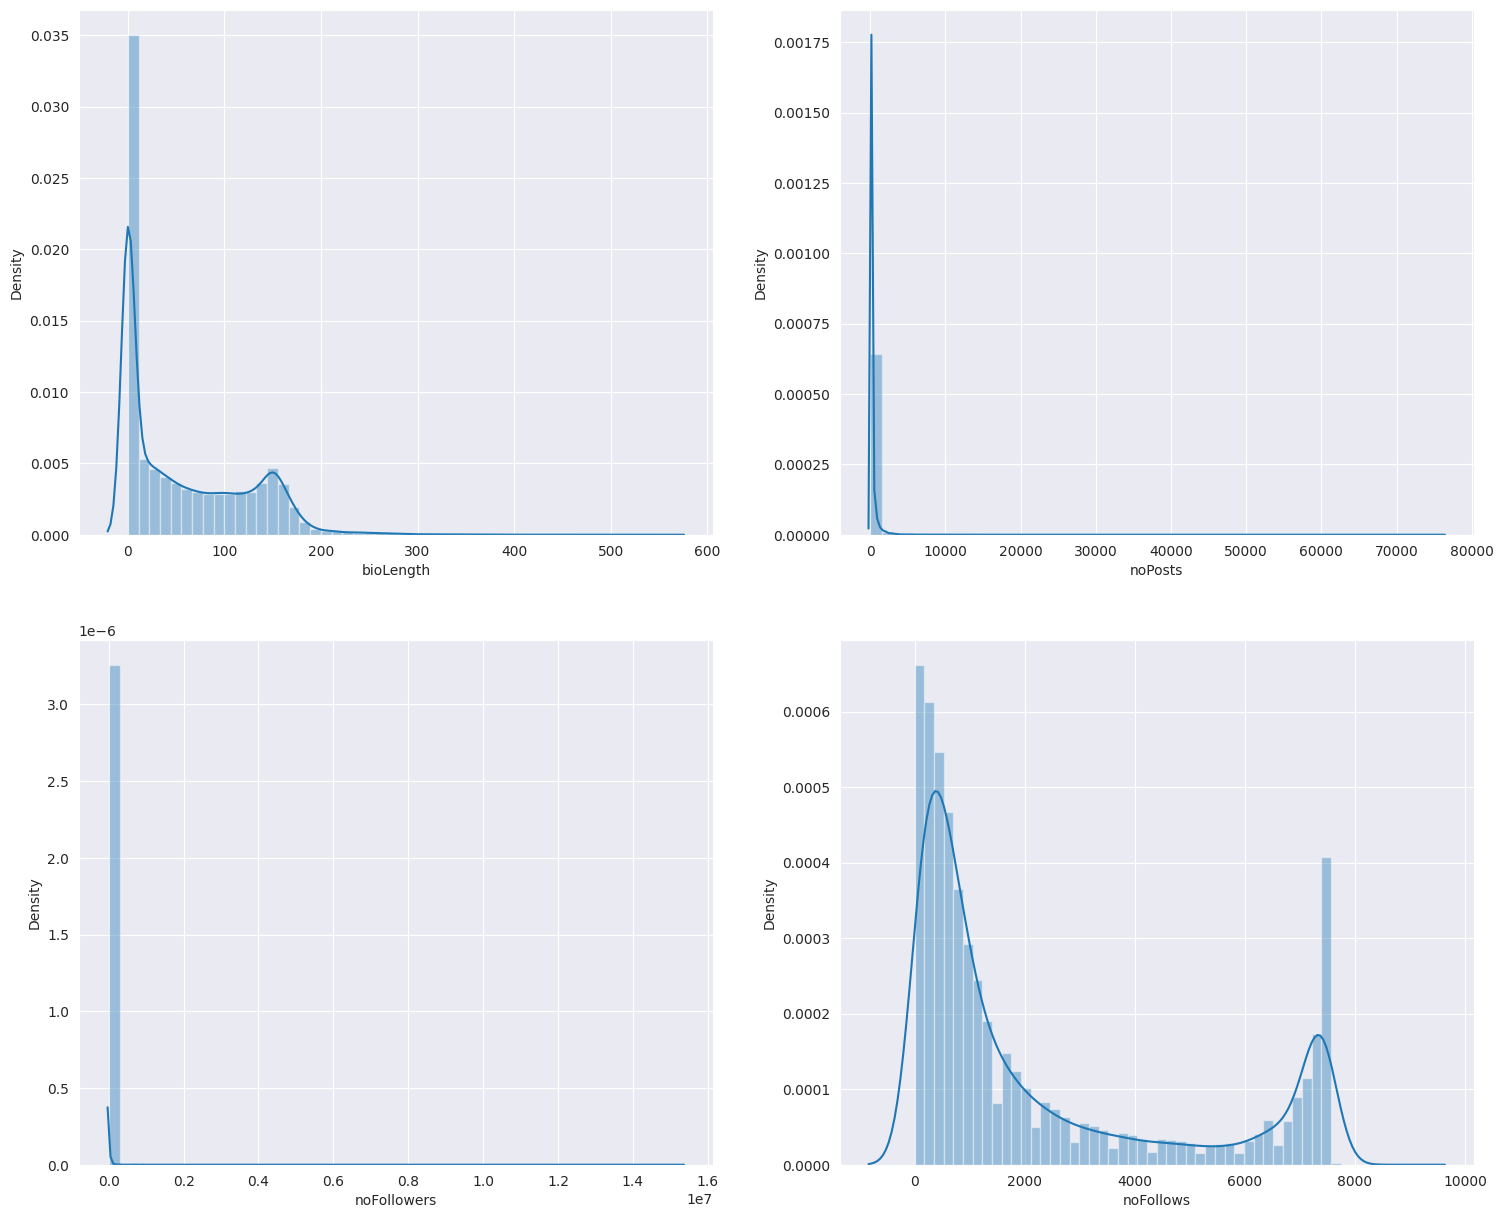

In [ ]:
# https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
plt.figure(figsize=[18,15])

plt.subplot(2, 2, 1)
sns.distplot(df_insta_main[continuous_features[0]])

plt.subplot(2, 2, 2)
sns.distplot(df_insta_main[continuous_features[1]])

plt.subplot(2, 2, 3)
sns.distplot(df_insta_main[continuous_features[2]])

plt.subplot(2, 2, 4)
sns.distplot(df_insta_main[continuous_features[3]])

* At first glance, all of the graphs do not seem to be normally distributed.
* All of the graphs seem to be positively skewed, or have a right skewed distribution.

#### **Box Plot**

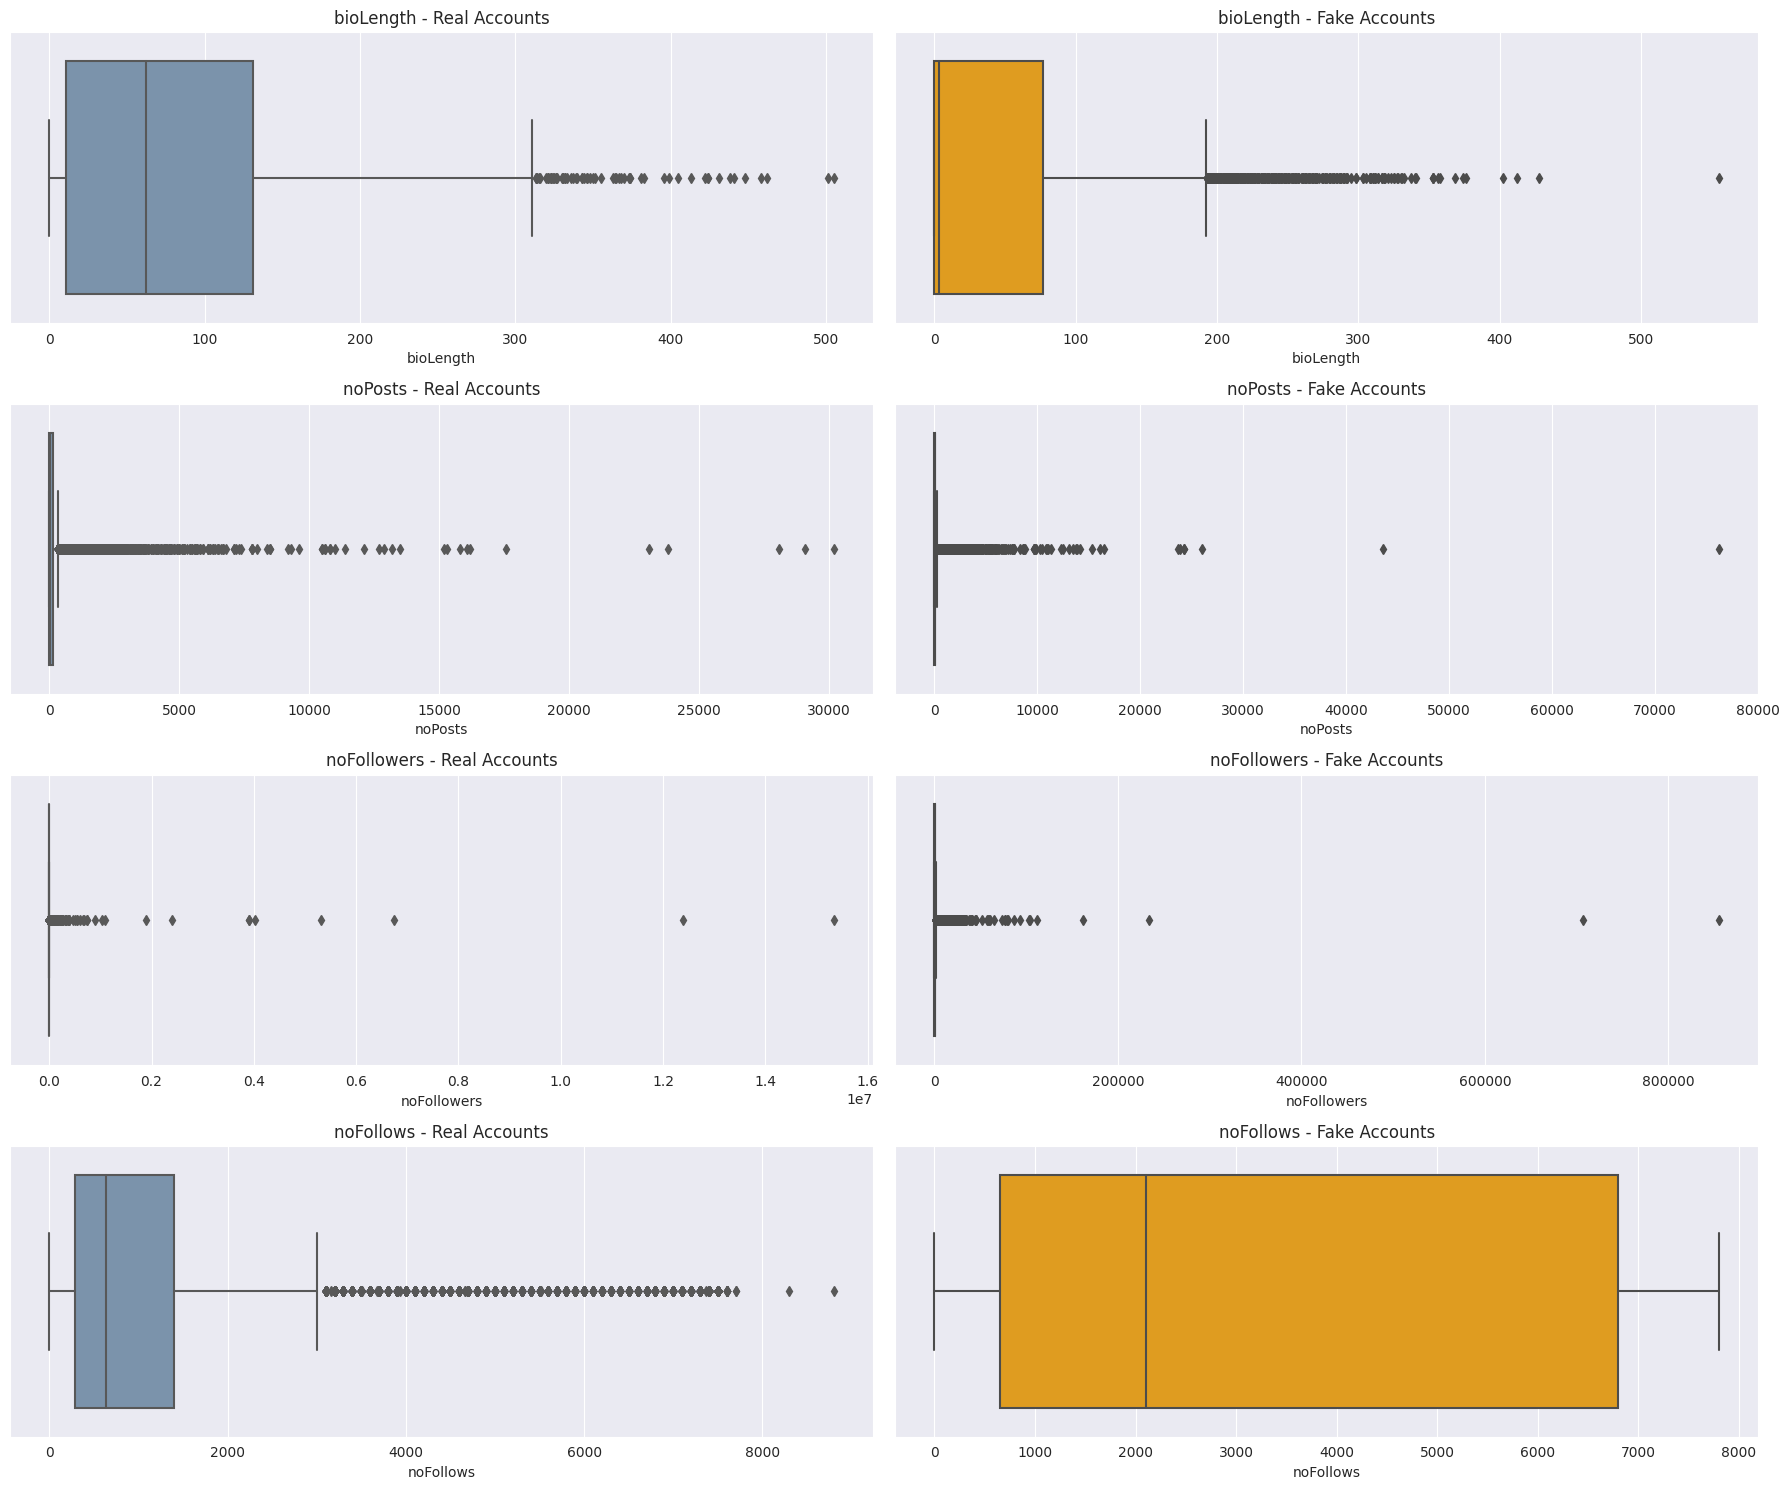

In [ ]:
# Plotting Boxplots
# https://www.kaggle.com/code/lusfernandotorres/insta-fake-spot-em#eda
fig, axes = plt.subplots(nrows=len(continuous_features), ncols=2, figsize=(18,15))

for i, col in enumerate(continuous_features):
    sns.boxplot(data=df_insta_main[df_insta_main['isFake'] == 0], x=col, ax=axes[i, 0], color = '#7393B3')
    sns.boxplot(data=df_insta_main[df_insta_main['isFake'] == 1], x=col, ax=axes[i, 1], color = 'orange')
    axes[i, 0].set_title(col + " - Real Accounts")
    axes[i, 1].set_title(col + " - Fake Accounts")

plt.tight_layout()
plt.show()

* At first glance, one can observe that there are a lot of outliers in the dataset. So this is something to consider during feature scaling when building the model.
* Real accounts seem to have a longer account bio length compared to fake accounts. 
* Fake accounts seem to follow many more instagram acounts compared to real users.    

#### **Pair Plot**

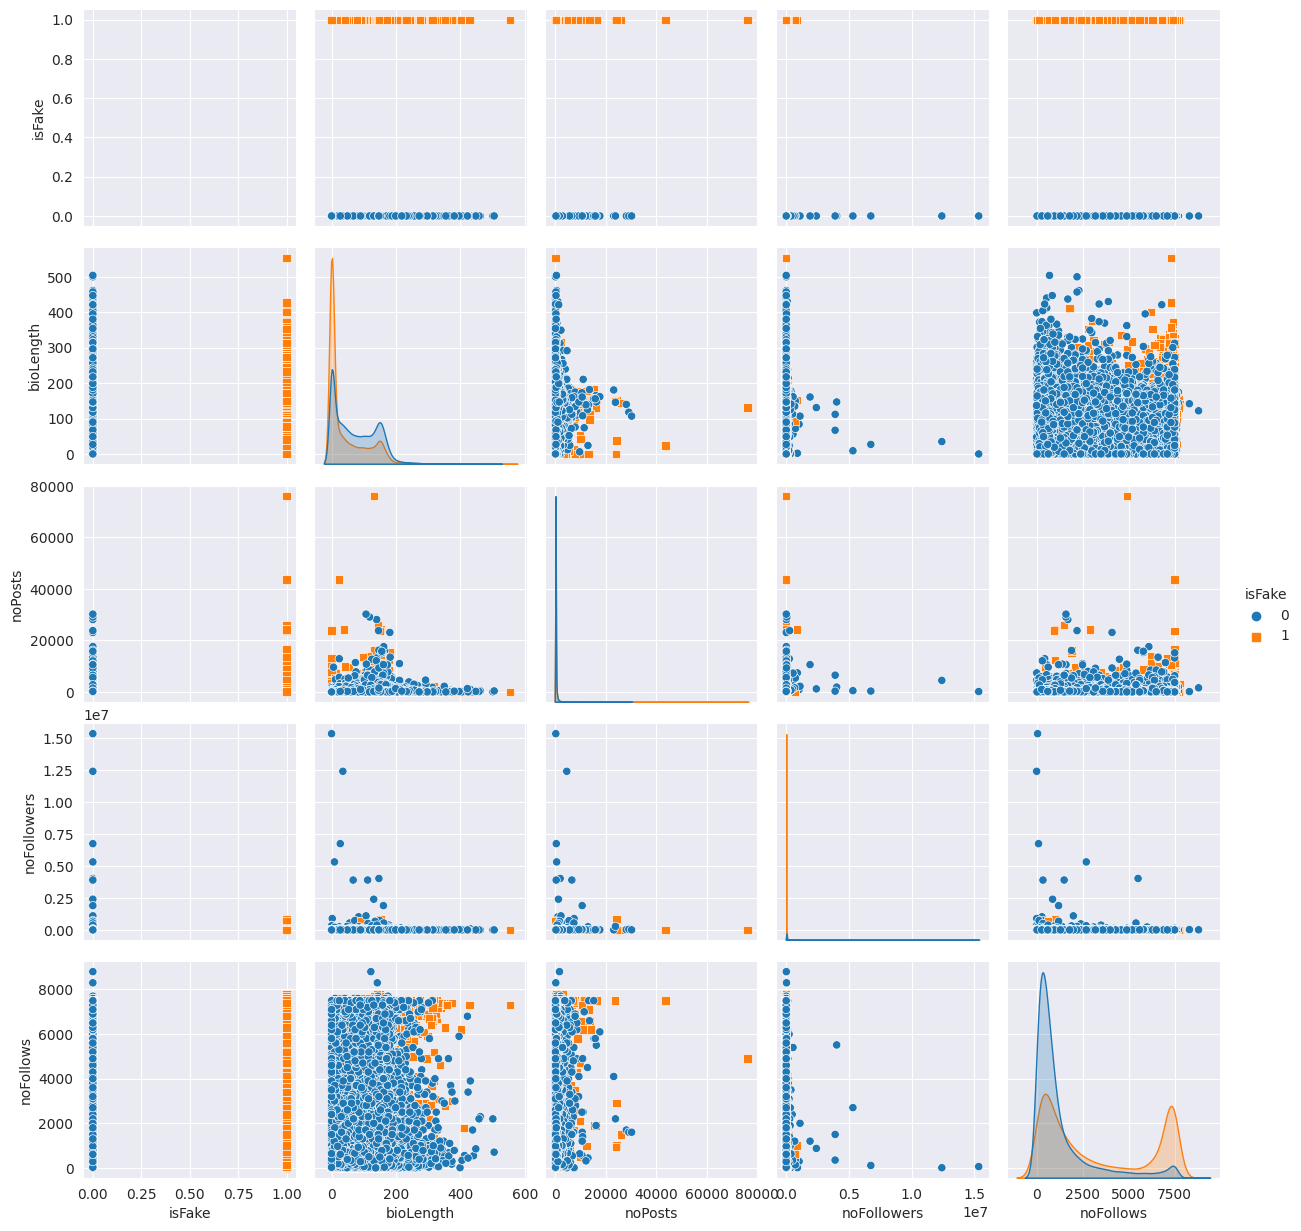

In [ ]:
# Visualising numeric variables
sns.pairplot(df_insta_main, 
             vars=['isFake', 'bioLength', 'noPosts', 'noFollowers', 'noFollows'], 
             hue='isFake', 
             markers=['o', 's'])
plt.show()

* There isn't any significantly obvious relationship that can be observed from the features above.

### **Correlation Matrix**

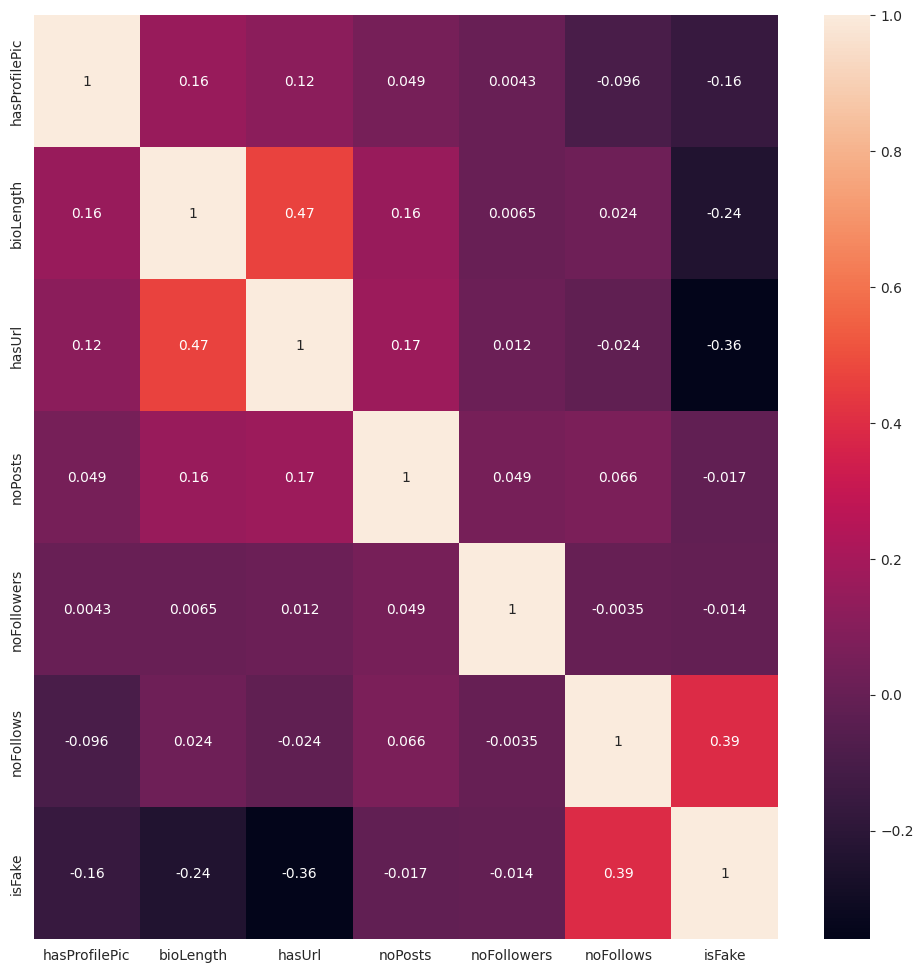

In [ ]:
# Correlation plot
# https://www.kaggle.com/code/durgeshrao9993/fake-instagram-profile-detection-model#Data-Visualization
plt.figure(figsize=(12,12))
cm = df_insta_main.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

* From the correlation matrix above, `noFollows` seems to have a positive relationship with the `isFake` target variable.
* On the other hand, `hasUrl` and `bioLength` seems to have a strong negative relationship with the `isFake` target variable.

### **Target Variable Analysis**
Viewing and visualizing the target variable distribution is important as it shows whether the current dataset that the model will be trained on is imbalanced or not. 

If the dataset is imbalanced, measures will need to be taken, such as using SMOTE techniques, to counteract the dataset imbalance to imporve performace and avoid overfitting and underfitting issues. 

In [ ]:
fig = px.pie(legend_df, names='isFake', title='Target Variable Distribution', color_discrete_sequence = ['#636EFA','#EF553B'])
fig.update_layout(template = 'ggplot2')
fig.show()

There is no significant class imbalance between fake and real Instagram accounts in the target variable. Hence, this project will not need to compensate for any class imbalance issues using SMOTE techniques as of now.

## **4.0 Baseline Model & Feature Selection**
Using a simple model, a benchmark can be created to evaluate the performance of various other classifier models. Through the baseline model, the importance and significance of the features in the dataset can be observed and evaluated. 

Hence, feature selection and feature engineering can be conducted much more efficiently by looking for the most impactful variables in the dataset when predicting the target variable.

**Random Forest Classifier** will be chosen as the benchmark model, while using the **AUC-ROC score** to evaluate its accuracy.

### **Baseline Model AUC-ROC Score**

In [ ]:
# Splitting dataset into independent variables (X) and target variable (y)
X = df_insta_main.drop('isFake', axis=1)
y = df_insta_main['isFake']

# Checking shape of X and y
print('Shape of X: ')
print(X.shape)
print('\n')
print('Shape of y: ')
print(y.shape)

Shape of X: 
(64646, 6)


Shape of y: 
(64646,)




AUC-ROC Baseline:  0.8




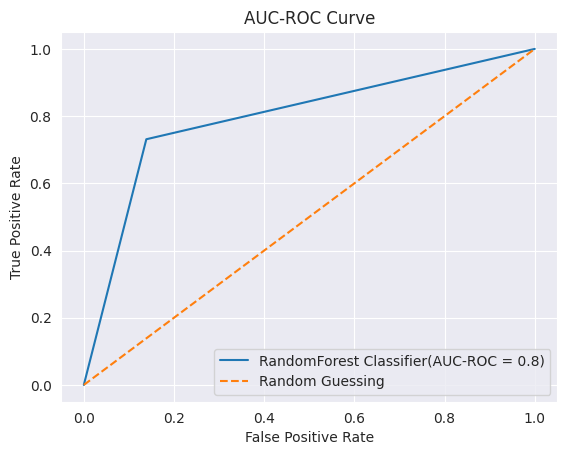



y_val value counts
0    101
1     93
Name: isFake, dtype: int64


predicted value counts
(array([0, 1]), array([112,  82]))


In [ ]:
# Training, predicting and evaluating baseline
# https://www.kaggle.com/code/lusfernandotorres/insta-fake-spot-em#baseline

# Creating smaller train and validation sets
# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.99, random_state = 2023)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 2023)

# Initializing mode
rf = RandomForestClassifier(random_state = 2023)
rf.fit(X_train, y_train) # Fitting to training data 

y_pred = rf.predict(X_val) # Predicting on validation set
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds})

baseline_score = roc_auc_score(y_val, y_pred)
print('\n')
print('AUC-ROC Baseline: ', baseline_score.round(2))
print('\n')

sns.set_style('darkgrid')
sns.lineplot(x='FPR', y='TPR', data=roc_df, label=f'RandomForest Classifier(AUC-ROC = {baseline_score.round(2)})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('\n')
print('y_val value counts')
print(y_val.value_counts())
print('\n')
print('predicted value counts')
print(np.unique(y_pred, return_counts=True))

For the purposes of model benchmarking and validation, only 1% of the dataset will be used.

* The baseline model achieved an **AUC-ROC score** of **0.80**, which is okay.

* The original `y_val` set had **101 real accounts** and **93 fake accounts**. The Random Forest Classifier predicted **112 real accounts** and **82 fake accounts**.

### **Feature Selection Using SHAP**
The **SHAP (SHapley Additive exPlanations) library** can be used to conduct feature selection by visualizing the average impact of each feature. A bar plot displaying the significance of each feature when predicting the target variable can be created.

https://pypi.org/project/shap/

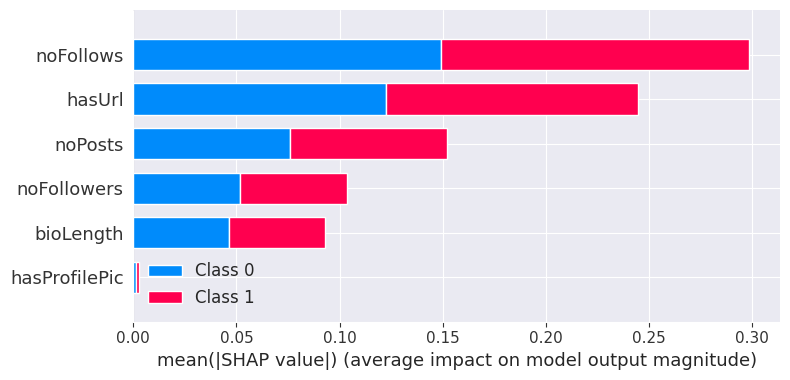

In [ ]:
# Plotting Feature Importance plot
shap_values = shap.TreeExplainer(rf).shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type="bar")

* From the SHAP summary plot above, all of the features seem to have an impact on the prediction results. 
* The most impactful feature seems to be the `noFollows` feature. Hence, the number of accounts a user follows can be a strong predictor on whether the account is a bot or not.
* The least impactful feature seems to be the `hasProfilePic` feature. Though the feature will be kept despite its minimal impact on the model output as it has still contributed a little bit.

## **5.0 Feature Engineering**
From the EDA results and observations, there are a couple of features that could be generated that are significant in the prediction of the target variable.

* `Activity Ratio`: The posting activity of an account in relation to the number of followers an account has. The equation is given below. 

  * *Activity Ratio =  (Number of Posts / Number of Followers)*

* `noFollowers > noFollows ?`: Most social media fake/bot accounts tend to have less followers when compared to the amount of accounts they follow. Hence, this binary feature will label the account as either 0 or 1 for each account.
  * 0 = User has a smaller amount of followers compared to the number of accounts they follow.
  * 1 = User has a larger amount of followers compared to the number of accounts they follow.

In [ ]:
# create activity ratio feature
df_insta_main['activity_ratio'] = np.round(df_insta_main['noPosts'] / df_insta_main['noFollowers'], 2)

# Does the account have more followers than follows?
df_insta_main['noFollowers > noFollows?'] = (df_insta_main['noFollowers'] > df_insta_main['noFollows']).astype(int)

# Visualizing new features on the dataframe
df_insta_main

,hasProfilePic,bioLength,hasUrl,noPosts,noFollowers,noFollows,isFake,activity_ratio,noFollowers > noFollows?
0,1,30,0,35,488,604,0,0.07,0
1,1,64,0,3,35,6,0,0.09,1
2,1,82,0,319,328,668,0,0.97,0
3,1,143,0,273,14890,7369,0,0.02,1
4,1,76,0,6,225,356,0,0.03,0
...,...,...,...,...,...,...,...,...,...
65321,1,0,0,13,145,642,0,0.09,0
65322,1,146,1,652,3000,1300,0,0.22,1
65323,1,147,1,1500,3700,3200,0,0.41,1
65324,1,218,1,329,1500,1800,0,0.22,0


### **New Feature Analysis**
The new features can be plotted into a chart in order to better observe and obtain any new insights.

#### **Number of Followers > Number of Follows**

In [ ]:
fig = px.histogram(df_insta_main, x=df_insta_main['noFollowers > noFollows?'], color=legend_df['isFake'],
                   color_discrete_sequence=['#636EFA','#EF553B'],
                   barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})
        
fig.update_layout(title='More Followers than Follows Distribution',
                  xaxis_title='noFollowers > noFollows?', yaxis_title='Count', xaxis=dict(tickmode='array',
                  tickvals=[0, 1],
                  ticktext=['No', 'Yes']),
                  )
        
fig.show()

* Most fake accounts follow more accounts than the number of following. 
  * A possible explanation for this is because fake accounts tend to follow lots of other accounts to boost their exposure.
* Users with more followers than the number of accounts the user is following are usually real accounts.

#### **Activity Ratio**

In [ ]:
# Plotting Activity Ratio plot
fig = px.box(df_insta_main, x='isFake', y='activity_ratio', color = legend_df['isFake'], title = "Activity Ratio (Number of Posts / Number of Followers)")

fig.update_layout(xaxis_title="Real/Fake", yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['Real Accounts', 'Fake Accounts']
                                                                               ),
                     )

# Show the plot
fig.show()

* Fake Instagram accounts tend to have a higher activity ratio than real accounts. 
* Although there are a lot of outliers for the activity ratio of fake accounts, it is still a very large positive ratio for fake accounts when compared to the activity ratio of real accounts.  

#### **Check & Drop INF and NULL Values**
It is important to check for inf and null values whenever a new feature is created, as a precautionary measure.

In [ ]:
print("Check for NULL Values:")
df_insta_main.isnull().sum()

Check for NULL Values:


hasProfilePic                 0
bioLength                     0
hasUrl                        0
noPosts                       0
noFollowers                   0
noFollows                     0
isFake                        0
activity_ratio              144
noFollowers > noFollows?      0
dtype: int64

In [ ]:
print("\n Check for INF Values:")
df_insta_main.isin([np.inf, -np.inf]).sum()


 Check for INF Values:


hasProfilePic               0
bioLength                   0
hasUrl                      0
noPosts                     0
noFollowers                 0
noFollows                   0
isFake                      0
activity_ratio              8
noFollowers > noFollows?    0
dtype: int64

As shown above, the new features have a couple of null and inf values, so they must be dropped to ensure a clean dataset.

In [ ]:
# replace infinite values with NaN
df_insta_main.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows containing NaN values
df_insta_main.dropna(inplace=True)

In [ ]:
# Check dataset after changes
print("Check for NULL Values:")
df_insta_main.isnull().sum()

Check for NULL Values:


hasProfilePic               0
bioLength                   0
hasUrl                      0
noPosts                     0
noFollowers                 0
noFollows                   0
isFake                      0
activity_ratio              0
noFollowers > noFollows?    0
dtype: int64

In [ ]:
print("\n Check for INF Values:")
df_insta_main.isin([np.inf, -np.inf]).sum()


 Check for INF Values:


hasProfilePic               0
bioLength                   0
hasUrl                      0
noPosts                     0
noFollowers                 0
noFollows                   0
isFake                      0
activity_ratio              0
noFollowers > noFollows?    0
dtype: int64

All NULL and INF values have been cleared.

## **6.0 Model Creation**

### **Feature Scaling**
Before creating the model, it is important to determine whether it is required to rescale the data. The means and standard deviation of the data can be calculated to observe their scale, and determine whether certain features have a larger scale compared to others. 

Features with large scalings tend to introduce bias to the model and cause overfitting issues as the model would tend to priotize said features and ignore the rest.

By scaling the data, all features will be able to impact and contribute equally to the model learning process.


In [ ]:
# Measuring mean values and standard deviations
df_means = df_insta_main.mean().round(2)
df_stds = df_insta_main.std().round(2)
results = pd.concat([df_means, df_stds], axis = 1)
results.columns = ['Mean', 'Standard Deviation']
results

,Mean,Standard Deviation
hasProfilePic,0.96,0.20
bioLength,58.46,64.15
hasUrl,0.29,0.45
noPosts,179.95,728.71
noFollowers,2051.55,90544.48
noFollows,2270.36,2557.19
isFake,0.49,0.50
activity_ratio,0.27,0.72
noFollowers > noFollows?,0.20,0.40


From the table above, `noFollowers` and `noFollows` have large values are on a larger scaled compared to the rest of the features. This can introduce bias to the model and cause overfitting issues.

Thus, it is important to rescale these features by implementing the Standard Scaler function into the pipeline to ensure all features have similar range of values

### **Model Selection**

In [ ]:
# Splitting Independent Features X and target variable y
X = df_insta_main.drop('isFake', axis = 1)
y = df_insta_main.isFake

# Splitting data into training and test sets. 30% of data will be used for testing after model selection
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 test_size = 0.30, random_state = 42)
# Further splitting data into training and validation sets. 20% of the training data will be used for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size = 0.20, random_state = 42)

XGBoost: AUC-ROC score = 0.79
LGBM: AUC-ROC score = 0.79
CatBoost: AUC-ROC score = 0.80
AdaBoost: AUC-ROC score = 0.78


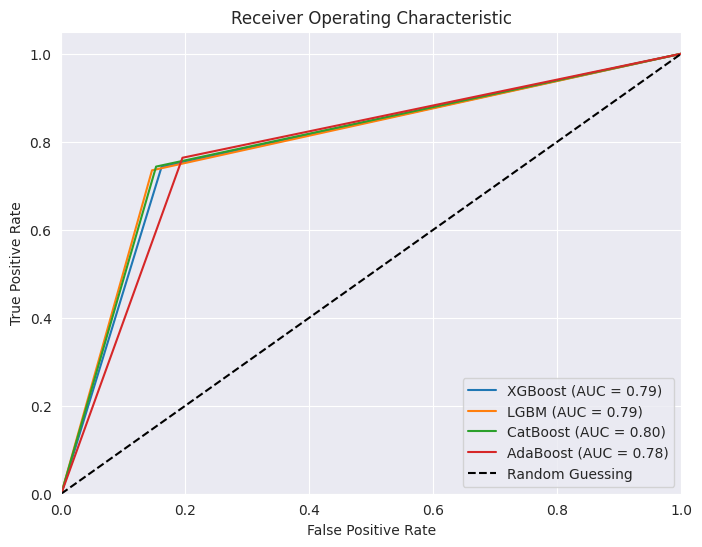

In [ ]:
# Defining models
models = {
    "XGBoost": XGBClassifier(random_state = 42),
    "LGBM": LGBMClassifier(random_state = 42),
    "CatBoost": CatBoostClassifier(verbose=False, random_state = 42),
    "AdaBoost": AdaBoostClassifier(random_state = 42)
}

# Defining the pipeline process for each model
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ("scaler", StandardScaler()), # Rescaling data
        ("model", model) # Initializing model
    ])

# Fitting and computing AUC-ROC scores
results = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    results[name] = {
        "pipeline": pipeline,
        "auc": auc
    }
    print(f"{name}: AUC-ROC score = {auc:.2f}")

# Plot AUC-ROC curve for all models
plt.figure(figsize=(8, 6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_val, result["pipeline"].predict(X_val))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Most of the models didn't perform much better than the Random Forest Classifier baseline of **0.80**, only slightly lower than the benchmark AUC score.

Since the **CatBoost** model's AUC score matches the benchmark score, as well as being the highest scoring model among the others, it will be chosen based on its performance.

## **7.0 Model Testing and Evaluation**


In [ ]:
# Creating a CatBoost model
catboost_pipeline = results["CatBoost"]["pipeline"] 

# Predicting on test data 
y_pred = catboost_pipeline.predict(X_test) 

### **AUC-ROC Score**

CatBoost: AUC-ROC score on unseen data = 0.7988


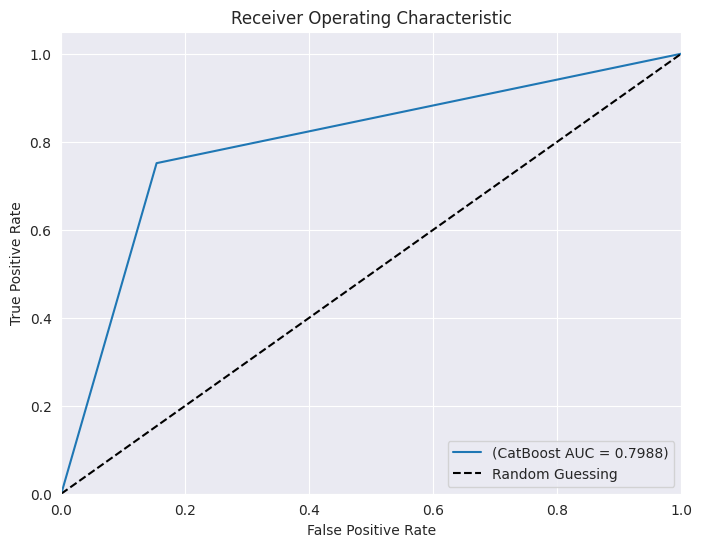

In [ ]:
# Computing AUC-ROC score
auc = roc_auc_score(y_test, y_pred)
print(f"CatBoost: AUC-ROC score on unseen data = {auc:.4f}")

# Plotting ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, catboost_pipeline.predict(X_test))
plt.plot(fpr, tpr, label=f"(CatBoost AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The final CatBoost model has achieved an **AUC-ROC score of 0.7988**, or **0.80** when rounded up. The score confirms that it is performing quite efficiently in identifying and classifying fake Instagram accounts.

### **Confusion Matrix**

Value counts for y_test:
0    9952
1    9397
Name: isFake, dtype: int64


Value counts for y_pred:
0    10759
1     8590
dtype: int64




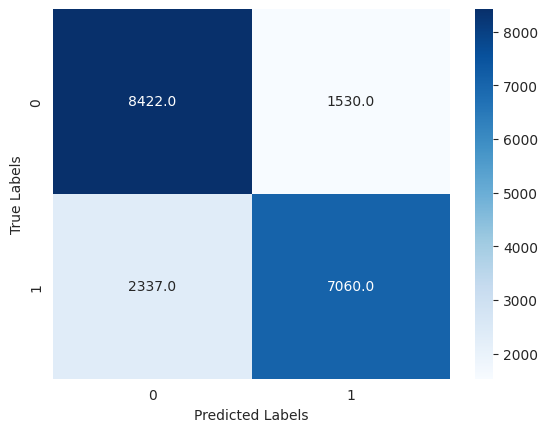

In [ ]:
# Printing value counts
print("Value counts for y_test:")
print(y_test.value_counts())
print('\n')
print("Value counts for y_pred:")
print(pd.Series(y_pred).value_counts())
print('\n')

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".1f")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

* The confusion matrix has shown that the CatBoost model has accurately identified **8422 accounts as real accounts** and **7060 accounts as fake accounts**.

* Though the model has **2337 false negatives** and **1530 false positives**. 

### **Classification Report**

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81      9952
           1       0.82      0.75      0.79      9397

    accuracy                           0.80     19349
   macro avg       0.80      0.80      0.80     19349
weighted avg       0.80      0.80      0.80     19349



* The model has an **accuracy score of 80%**.
* The model has an **average f1-score of 80%**.

## **8.0 Model Explainability**
By using the `SHAP` library once more, it is possible to gain further understanding as to how the model functions and what features were significant during the classification process.

It is also able to help visualize the impact of the newly engineered features and gauge their significance. 

100%|===================| 19338/19349 [08:36<00:00]       

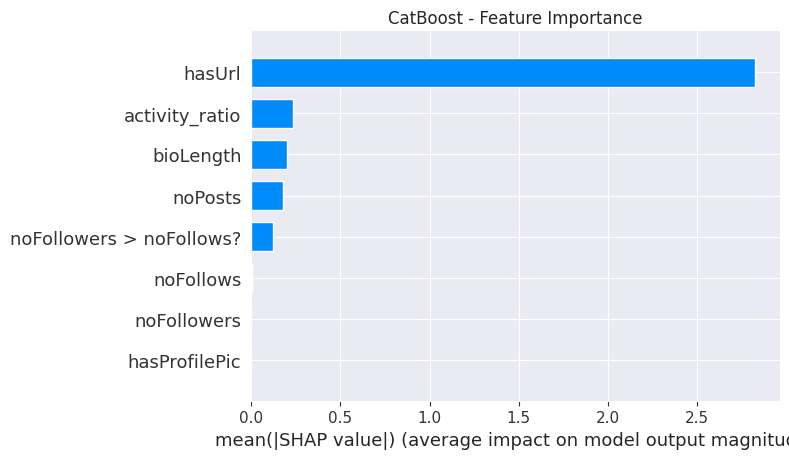

In [ ]:
# Extracting the model and explainer
model = catboost_pipeline.named_steps['model']
explainer = shap.Explainer(model, X_train)

# Computing the SHAP values
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('CatBoost - Feature Importance')
plt.tight_layout()
plt.show()

From the `SHAP` bar chart above, it shows that both of the newly created features, `activity ratio` and `noFollowers > noFollows?`, has had a significant impact on the prediction performance. 

Aside from those two features, the rest of the features that the CatBoost model relied on to make its predictions are `hasUrl`, `bioLength` and `noPosts`, with `hasUrl` being relied on pretty heavily by the model.